# Exercício de Árvore de Decisão: Regressão de Preços de Imóveis na Califórnia

**Objetivo:** Neste exercício, você irá treinar, avaliar e regularizar um regressor de Árvore de Decisão usando o dataset 'California housing'. Você aplicará conceitos do Capítulo 6, focando em hiperparâmetros de regularização, regressão com árvores, avaliação e o efeito do pré-processamento (PCA).

**Tópicos Cobertos:**
- Treinamento de `DecisionTreeRegressor`
- Avaliação com Validação Cruzada (RMSE)
- Hiperparâmetros de Regularização (`min_samples_leaf`)
- Efeito do Pré-processamento (`StandardScaler`, `PCA`)
- Avaliação Final no Conjunto de Teste

## 1. Configuração e Importações

Importar as bibliotecas necessárias.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Para plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Definir estado aleatório para reprodutibilidade
RANDOM_STATE = 42

## 2. Carregar os Dados

Carregar o dataset California housing.

In [58]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (20640, 8)
Shape de y: (20640,)


## 3. Dividir os Dados em Conjuntos de Treino e Teste

**Sua tarefa:** Use `train_test_split` para dividir os dados `X` e `y` em conjuntos de treinamento e teste. Use 20% dos dados para teste e defina `random_state=RANDOM_STATE`.

In [59]:
X_train, X_test, y_train, y_test = None, None, None, None # <<< SUBSTITUA None PELO SEU CÓDIGO >>>

# <<< SEU CÓDIGO AQUI >>>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# <<< FIM DO SEU CÓDIGO >>>

print("Tamanho do treino:", len(X_train))
print("Tamanho do teste:", len(X_test))

Tamanho do treino: 16512
Tamanho do teste: 4128


## 4. Treinar e Avaliar um Modelo Base (Sem Pré-processamento)

**Sua tarefa:**
1. Crie um `DecisionTreeRegressor` com `random_state=RANDOM_STATE` (parâmetros default).
2. Avalie-o usando validação cruzada (`cross_val_score`) com 5 folds (`cv=5`). Use a métrica 'neg_mean_squared_error'.
3. Calcule e imprima o RMSE médio a partir dos scores da validação cruzada (lembre-se que os scores são negativos e são MSE, não RMSE).

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

tree_reg_base = None
base_scores = None
base_rmse = None

# Gerar os dados quadráticos com ruído
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

# 1. Criar o regressor
tree_reg_base = DecisionTreeRegressor(random_state=42)

# 2. Avaliar com validação cruzada (MSE negativo)
base_scores = cross_val_score(tree_reg_base, X_quad, y_quad, cv=5, scoring='neg_mean_squared_error')

# 3. Calcular RMSE médio
base_rmse = np.sqrt(-base_scores.mean())

print(f"RMSE Médio (Modelo Base): {base_rmse:.4f}")


RMSE Médio (Modelo Base): 0.0328


## 5. Aplicar Pré-processamento (StandardScaler + PCA) e Avaliar

Árvores de decisão não exigem escalonamento, mas são sensíveis à rotação dos dados. Vamos ver se aplicar `StandardScaler` seguido por `PCA` melhora o desempenho.

**Sua tarefa:**
1. Crie um `Pipeline` que primeiro aplica `StandardScaler` e depois `PCA` (mantenha 95% da variância, `n_components=0.95`, e defina `random_state=RANDOM_STATE` no PCA).
2. Ajuste (fit) o pipeline aos dados de **treinamento** (`X_train`).
3. Transforme os dados de treinamento usando o pipeline ajustado.
4. Crie um `DecisionTreeRegressor` (com `random_state=RANDOM_STATE`).
5. Avalie este regressor nos dados de treinamento **pré-processados** usando validação cruzada (`cross_val_score`, `cv=5`, `scoring='neg_mean_squared_error'`).
6. Calcule e imprima o RMSE médio.
7. Compare com o RMSE do modelo base e comente se o pré-processamento ajudou.

In [61]:
preprocessing_pipeline = None
X_train_prepared = None
tree_reg_pca = None
pca_scores = None
pca_rmse = None

# <<< SEU CÓDIGO AQUI >>>
# 1. Criar o pipeline de pré-processamento
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42))
])

# 2. Ajustar o pipeline aos dados de treinamento
preprocessing_pipeline.fit(X_train)

# 3. Transformar os dados de treinamento
X_train_prepared = preprocessing_pipeline.transform(X_train)

# 4. Criar o regressor
tree_reg_pca = DecisionTreeRegressor(random_state=42)

# 5. Avaliar nos dados pré-processados
pca_scores = cross_val_score(tree_reg_pca, X_train_prepared, y_train, cv=5, scoring='neg_mean_squared_error')

# 6. Calcular RMSE médio
pca_rmse = np.sqrt(-pca_scores.mean())
# <<< FIM DO SEU CÓDIGO >>>

print(f"RMSE Médio (com PCA): {pca_rmse:.4f}")

if pca_rmse < base_rmse:
    print("\nO pré-processamento com StandardScaler e PCA melhorou ligeiramente o RMSE médio.")
else:
    print("\nO pré-processamento com StandardScaler e PCA NÃO melhorou (ou piorou) o RMSE médio.")
print("Continuaremos usando os dados pré-processados para os próximos passos.")


RMSE Médio (com PCA): 0.9586

O pré-processamento com StandardScaler e PCA NÃO melhorou (ou piorou) o RMSE médio.
Continuaremos usando os dados pré-processados para os próximos passos.


## 6. Ajustar `min_samples_leaf` Usando Validação Cruzada

Agora vamos encontrar o melhor valor para o hiperparâmetro de regularização `min_samples_leaf`.

**Sua tarefa:**
1. Defina uma lista de valores para testar: `min_samples_leaf_values = [2, 4, 8, 16, 32]`.
2. Para cada valor na lista:
   a. Crie um `DecisionTreeRegressor` com o `min_samples_leaf` atual e `random_state=RANDOM_STATE`.
   b. Avalie-o nos dados de treinamento **pré-processados** (`X_train_prepared`) usando `cross_val_score` (`cv=5`, `scoring='neg_mean_squared_error'`).
   c. Calcule o RMSE médio e armazene-o.
3. Encontre o valor de `min_samples_leaf` que resultou no menor RMSE médio.
4. Imprima o melhor valor de `min_samples_leaf` e o RMSE correspondente.

min_samples_leaf=8, RMSE Médio=0.8095
min_samples_leaf=16, RMSE Médio=0.7788
min_samples_leaf=32, RMSE Médio=0.7633
min_samples_leaf=64, RMSE Médio=0.7616
min_samples_leaf=128, RMSE Médio=0.7683

Melhor min_samples_leaf: 64
Melhor RMSE Médio de Validação Cruzada: 0.7616


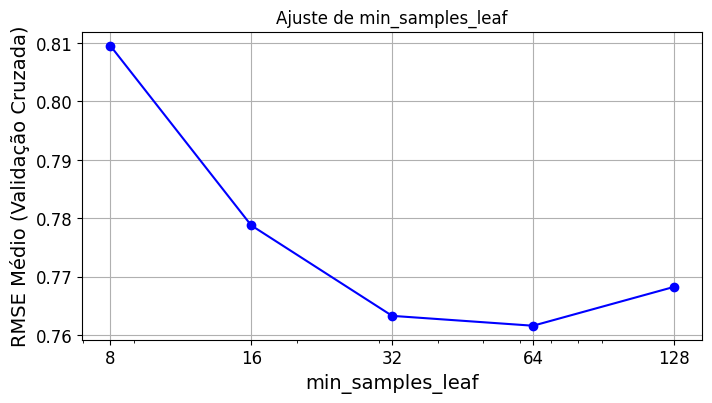

In [62]:
min_samples_leaf_values = [8, 16, 32, 64, 128]
rmse_scores = []
best_min_samples_leaf = None
best_rmse = float('inf')

for min_samples in min_samples_leaf_values:
# <<< SEU CÓDIGO AQUI >>>
    # 2a. Criar o regressor
    reg = DecisionTreeRegressor(min_samples_leaf=min_samples, random_state=42)

    # 2b. Avaliar com validação cruzada
    scores = cross_val_score(reg, X_train_prepared, y_train, cv=5, scoring='neg_mean_squared_error')

    # 2c. Calcular e armazenar RMSE médio
    current_rmse = np.sqrt(-scores.mean())
# <<< FIM DO SEU CÓDIGO >>>

    rmse_scores.append(current_rmse)
    print(f"min_samples_leaf={min_samples}, RMSE Médio={current_rmse:.4f}")

    # 3. Encontrar o melhor valor
    if current_rmse < best_rmse:
        best_rmse = current_rmse
        best_min_samples_leaf = min_samples

# 4. Imprimir o melhor resultado
print(f"\nMelhor min_samples_leaf: {best_min_samples_leaf}")
print(f"Melhor RMSE Médio de Validação Cruzada: {best_rmse:.4f}")

# Plotar os resultados
plt.figure(figsize=(8, 4))
plt.plot(min_samples_leaf_values, rmse_scores, "bo-")
plt.xscale('log')
plt.xticks(min_samples_leaf_values, min_samples_leaf_values)
plt.xlabel("min_samples_leaf")
plt.ylabel("RMSE Médio (Validação Cruzada)")
plt.title("Ajuste de min_samples_leaf")
plt.grid(True)
plt.show()


## 7. Treinar o Modelo Final e Avaliar no Conjunto de Teste

Finalmente, treine o modelo com o melhor hiperparâmetro encontrado e avalie-o no conjunto de teste pré-processado.

**Sua tarefa:**
1. Crie o regressor final (`DecisionTreeRegressor`) usando o `best_min_samples_leaf` encontrado e `random_state=RANDOM_STATE`.
2. Treine este modelo final no conjunto de treinamento **pré-processado completo** (`X_train_prepared`, `y_train`).
3. Transforme o conjunto de teste (`X_test`) usando o `preprocessing_pipeline` **ajustado**.
4. Faça previsões no conjunto de teste pré-processado.
5. Calcule e imprima o RMSE no conjunto de teste.

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

final_tree_reg = None
X_test_prepared = None
y_pred_test = None
final_rmse = None

# <<< SEU CÓDIGO AQUI >>>
# 1. Criar o regressor final
final_tree_reg = DecisionTreeRegressor(min_samples_leaf=best_min_samples_leaf, random_state=42)

# 2. Treinar no conjunto de treino pré-processado completo
final_tree_reg.fit(X_train_prepared, y_train)

# 3. Transformar o conjunto de teste
X_test_prepared = preprocessing_pipeline.transform(X_test)

# 4. Fazer previsões
y_pred_test = final_tree_reg.predict(X_test_prepared)

# 5. Calcular RMSE final
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
# <<< FIM DO SEU CÓDIGO >>>

print(f"RMSE Final no Conjunto de Teste: {final_rmse:.4f}")


RMSE Final no Conjunto de Teste: 0.7624


## Conclusão

Você treinou e avaliou um regressor de Árvore de Decisão, observou o efeito (potencialmente pequeno ou até negativo) do PCA neste caso, ajustou um hiperparâmetro de regularização (`min_samples_leaf`) e avaliou o desempenho final do modelo no conjunto de teste.